<a href="https://colab.research.google.com/github/j-cunanan/MLT-contributions/blob/master/SVD_mml_book_chp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from skimage import color
import imageio

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

**Example 4.12**

In [2]:
A = tf.constant([1, -0.8, 0, 1, 1, 0], shape=(3,2))
A

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 1. , -0.8],
       [ 0. ,  1. ],
       [ 1. ,  0. ]], dtype=float32)>

Let `script_X` be a square 2 by 2 grid centered at the origin

In [3]:
X,Y = np.mgrid[-1:1:0.1, -1:1:0.1]
points = np.vstack([X.ravel(), Y.ravel()])
points.shape, Y.shape, Y.shape

((2, 400), (20, 20), (20, 20))

In [4]:
# Having full_matrices=True gives same SVD decomposition as in our theorem
# The default setting full_matrices=False gives the 'reduced SVD' decomposition: This merely ensures the diagonal is a square matrix
s, u, v = tf.linalg.svd(A, full_matrices=True)

s.shape, u.shape, v.shape

(TensorShape([2]), TensorShape([3, 3]), TensorShape([2, 2]))

In [0]:
def SVD_GI(A):
  """ Applies a 3x2 matrix to a square grid of points and plots the sequence of linear transformations happenning in SVD
  """

  s, u, v = tf.linalg.svd(A, full_matrices=True)
  # Set up a figure 
  fig = plt.figure(figsize=(10,10))
  fig.suptitle('Geometric Intuition of SVD')

  # build the square grid of points script_X
  x, y = np.mgrid[-1:1:0.1, -1:1:0.1]
  points = np.vstack([x.ravel(), y.ravel()])

  # Apply the linear transformation A to script_X
  LT = A@points #shape [3, 400]

  # First subplot
  ax = fig.add_subplot(2, 2, 1)

  ax.scatter(x, y, c=Y, marker='o', alpha=0.9,  cmap=plt.cm.jet)
  ax.set_xticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_yticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')

  #Second subplot
  ax = fig.add_subplot(2,2,2, projection='3d')

  ax.scatter(LT[0], LT[1], LT[2], c = Y, marker='o', alpha=0.9,  cmap=plt.cm.jet)

  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  ax.set_zlabel('x_3')

  # Third subplot
  ax = fig.add_subplot(2, 2, 3)

  rot = v.numpy().T@points #shape=(2, 400)

  ax.scatter(rot[0], rot[1], c=Y, marker='o', alpha=0.9,  cmap=plt.cm.jet)
  ax.set_xticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_yticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')

  # Forth subplot
  ax = fig.add_subplot(2,2,4, projection='3d')
  
  S = tf.linalg.diag(s, num_rows=3, num_cols=2) # create the diagonal matrix for the singular values s
  _LT = S@rot # shape= (3,400)

  ax.scatter(_LT[0], _LT[1], _LT[2], c=Y, marker='o', alpha=0.9,  cmap=plt.cm.jet)
  ax.set_xticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_yticks(ticks=np.arange(-1.5,1.6,0.5))
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')

  plt.show()

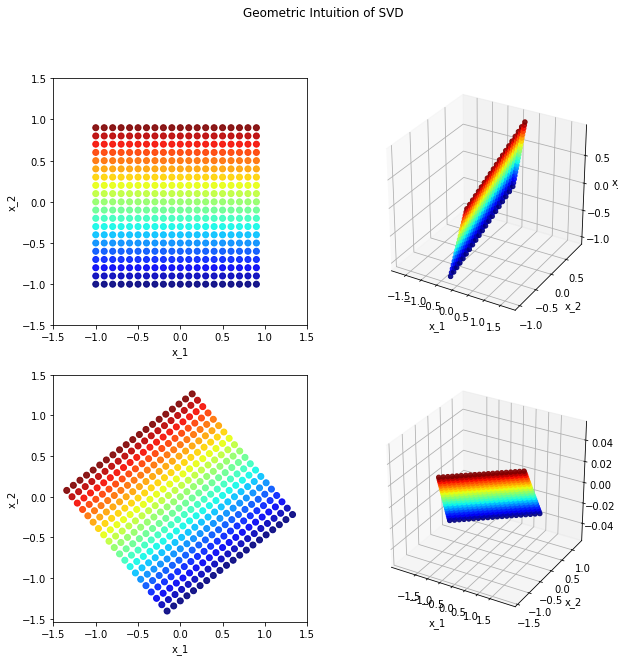

In [6]:
SVD_GI(A)

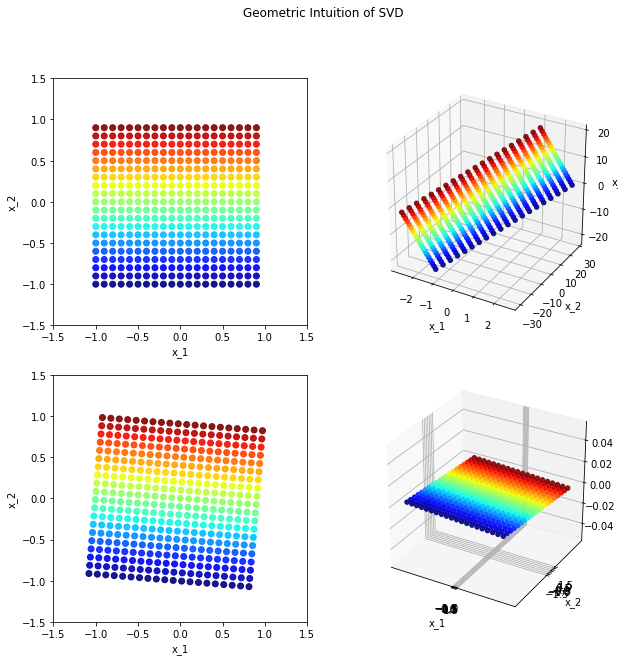

In [7]:
SVD_GI(tf.constant([2, -0.8, 30, -1, 11, 10], shape=(3,2)))

In [8]:
#Outer product illustration
a = np.array([0,1,2,3]) # len=4
b = np.array([0,1,2]) # len=3

np.outer(a,b) #size=(4,3)

array([[0, 0, 0],
       [0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

https://cdn11.bigcommerce.com/s-jb5fhwx/product_images/uploaded_images/50-600x325-1-.jpg


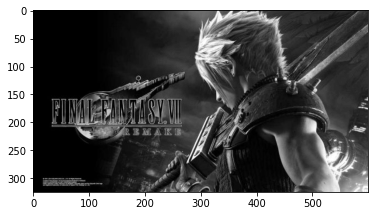

In [9]:
url = input()
im = imageio.imread(url)
im = color.rgb2gray(im)
plt.imshow(im, cmap='gray')

In [10]:
im.shape

(325, 600)

In [11]:
s, u, v = tf.linalg.svd(im)

s.shape, u.shape,tf.linalg.diag(s).shape, v.shape

(TensorShape([325]),
 TensorShape([325, 325]),
 TensorShape([325, 325]),
 TensorShape([600, 325]))

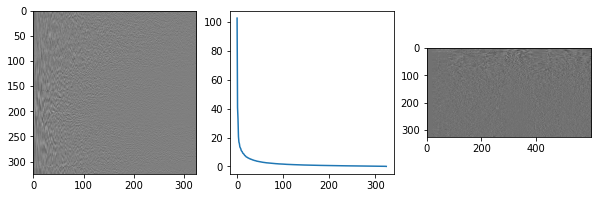

In [12]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

#fig.figure()
axes[0].imshow(u, cmap='gray')
axes[1].plot(s)
axes[2].imshow(tf.transpose(v), cmap='gray')

In [0]:
def SVD(A,k,scaler=None):
  s, u, v = tf.linalg.svd(A)
  if scaler is None:
    Ak = u[:,0:k]@tf.linalg.diag(s[0:k])@tf.transpose(v[:,0:k], conjugate=True)
    plt.imshow(Ak, cmap='gray')
    return Ak
  else:
    dil = tf.constant(scaler, shape=(k,),dtype=tf.float64)
    Ak = u[:,0:k]@tf.linalg.diag(s[0:k]*dil)@tf.transpose(v[:,0:k], conjugate=True)
    plt.imshow(Ak, cmap='gray')

    return Ak

In [14]:
def SVDviewer(r=1):
  percent = r/len(s)*100
  print(f'Using only {np.round(percent,3)} percent of all singular values')
  SVD(im,r)
  
interact(SVDviewer,r=widgets.IntSlider(min=1, max=min(im.shape[0],im.shape[1]), step=1, value=min(im.shape[0],im.shape[1])))

interactive(children=(IntSlider(value=325, description='r', max=325, min=1), Output()), _dom_classes=('widget-…

<function __main__.SVDviewer>

In [15]:
def SVD2viewer(k=1):
  percent = k/len(s)*100
  print(f'Using only {np.round(percent,3)} percent of all singular values')
  SVD(im,k,[i for i in range(1,k+1)])
  
interact(SVD2viewer,k=widgets.IntSlider(min=1, max=min(im.shape[0], im.shape[1]), step=1, value=min(im.shape[0], im.shape[1])))

interactive(children=(IntSlider(value=325, description='k', max=325, min=1), Output()), _dom_classes=('widget-…

<function __main__.SVD2viewer>

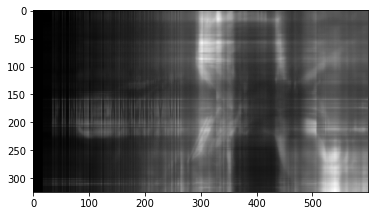

In [16]:
 ghost = SVD(im,100,[1/(i) for i in range(1,101)])